In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("05.2022_Пассажиропоток.xlsx")
df.head()

,Дата рейса,Рейс,Вход в чистую зону,Выход на рейс,Терминал,Авиакомпания,Направление куда летит
0,2022-05-01,5N 237,2022-04-30 21:46:20,2022-05-01 00:21:00,B,5N,OVB
1,2022-05-01,5N 237,2022-04-30 21:46:47,2022-05-01 00:21:00,B,5N,OVB
2,2022-05-01,5N 237,2022-04-30 21:47:47,2022-05-01 00:21:00,B,5N,OVB
3,2022-05-01,5N 237,2022-04-30 21:48:20,2022-05-01 00:21:00,B,5N,OVB
4,2022-05-01,5N 237,2022-04-30 21:49:12,2022-05-01 00:21:00,B,5N,OVB


In [3]:
for col in df.columns:
    print(col, df[col].unique(), "\n")

Дата рейса ['2022-05-01T00:00:00.000000000' '2022-05-02T00:00:00.000000000'
 '2022-05-03T00:00:00.000000000' '2022-05-04T00:00:00.000000000'
 '2022-05-05T00:00:00.000000000' '2022-05-06T00:00:00.000000000'
 '2022-05-07T00:00:00.000000000' '2022-05-08T00:00:00.000000000'
 '2022-05-09T00:00:00.000000000' '2022-05-10T00:00:00.000000000'
 '2022-05-11T00:00:00.000000000' '2022-05-12T00:00:00.000000000'
 '2022-05-13T00:00:00.000000000' '2022-05-14T00:00:00.000000000'
 '2022-05-15T00:00:00.000000000' '2022-05-16T00:00:00.000000000'
 '2022-05-17T00:00:00.000000000' '2022-05-18T00:00:00.000000000'
 '2022-05-19T00:00:00.000000000' '2022-05-20T00:00:00.000000000'
 '2022-05-21T00:00:00.000000000' '2022-05-22T00:00:00.000000000'
 '2022-05-23T00:00:00.000000000' '2022-05-24T00:00:00.000000000'
 '2022-05-25T00:00:00.000000000' '2022-05-26T00:00:00.000000000'
 '2022-05-27T00:00:00.000000000' '2022-05-28T00:00:00.000000000'
 '2022-05-29T00:00:00.000000000' '2022-05-30T00:00:00.000000000'
 '2022-05-31T0

In [4]:
df.dtypes

Дата рейса                datetime64[ns]
Рейс                              object
Вход в чистую зону        datetime64[ns]
Выход на рейс             datetime64[ns]
Терминал                          object
Авиакомпания                      object
Направление куда летит            object
dtype: object

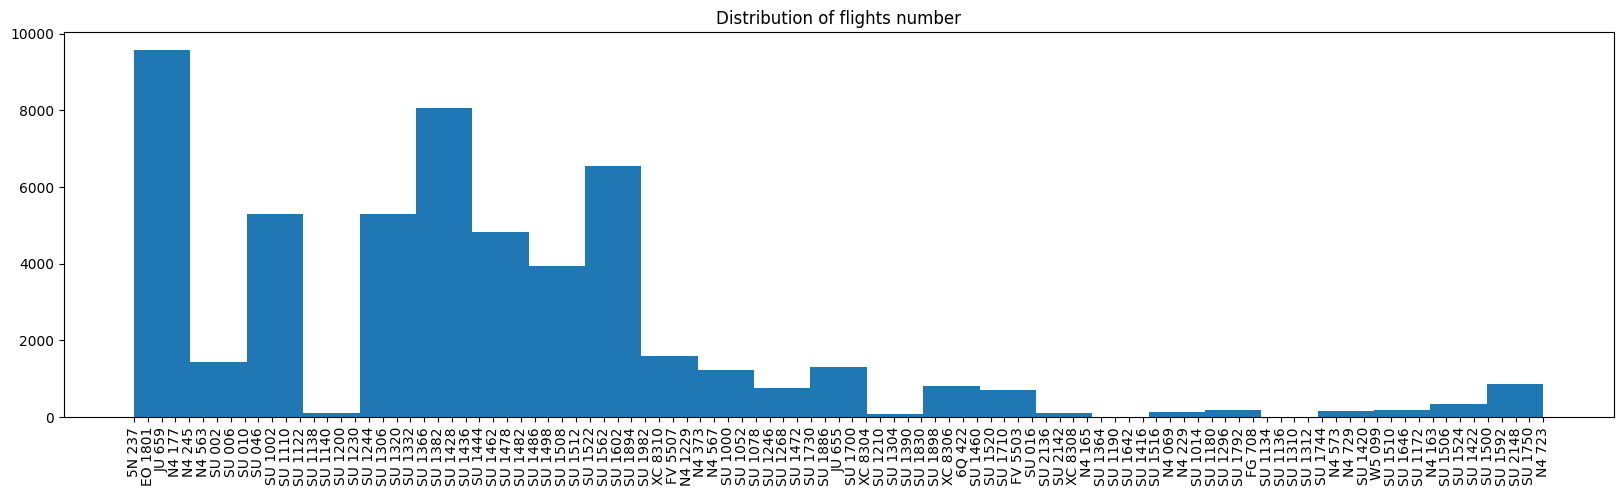

In [5]:
plt.figure(figsize=(20, 5))
plt.hist(df["Рейс"], bins=25)
plt.title("Distribution of flights number")
plt.xticks(rotation=90)
plt.show()

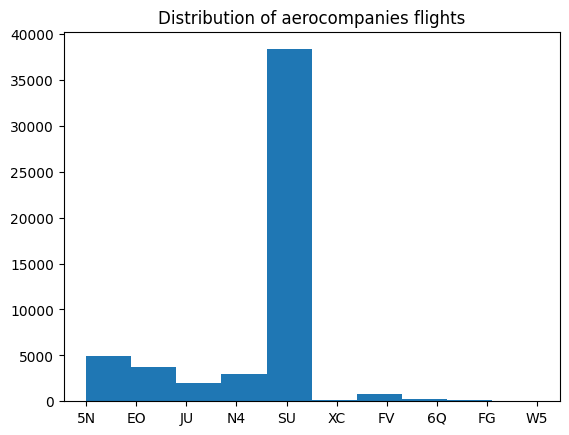

In [6]:
plt.hist(df["Авиакомпания"])
plt.title("Distribution of aerocompanies flights")
plt.show()

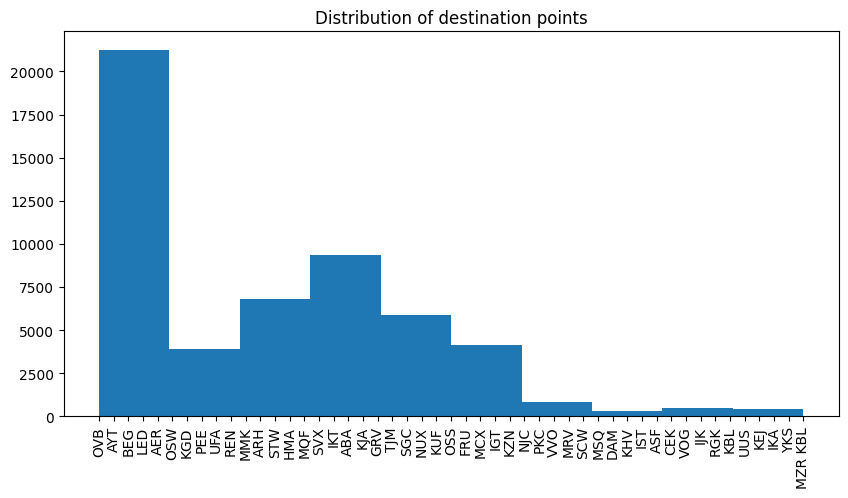

In [7]:
plt.figure(figsize=(10, 5))
plt.hist(df["Направление куда летит"])
plt.title("Distribution of destination points")
plt.xticks(rotation=90)
plt.show()

In [8]:
def preprocess_passtream(df: pd.DataFrame) -> pd.DataFrame:
    data = df.copy()

    data["Вход в чистую зону"] = data["Вход в чистую зону"].dt.ceil('30T')
    data["Выход на рейс"] = data["Выход на рейс"].dt.floor('30T')

    data = data[data["Терминал"] == "B"]

    data.drop(columns=["Терминал", "Авиакомпания", "Дата рейса"], inplace=True)

    data.rename(columns={
        "Рейс": "flight", "Вход в чистую зону": "entrance_time",
        "Выход на рейс": "departure_time",
        "Направление куда летит": "destination"
        }, inplace=True)
    
    data.set_index(["entrance_time", "departure_time"], inplace=True)
    data.reset_index(inplace=True)

    return data

In [9]:
def count_passengers(data):
    pass_count = pd.DataFrame({"time": pd.date_range(
        start="2022-05-01 00:00:00", end="2022-05-31 23:30:00", freq="30min"
    )})


    def moment_count(ts: pd.Timestamp):
        return len(data[(data["entrance_time"] <= ts) & (data["departure_time"] >= ts)])
            
    pass_count["num_passengers"] = pass_count.apply(lambda x: moment_count(x["time"]), axis=1)
    
    return pass_count

In [10]:
data = preprocess_passtream(df)
data

,entrance_time,departure_time,flight,destination
0,2022-04-30 22:00:00,2022-05-01 00:00:00,5N 237,OVB
1,2022-04-30 22:00:00,2022-05-01 00:00:00,5N 237,OVB
2,2022-04-30 22:00:00,2022-05-01 00:00:00,5N 237,OVB
3,2022-04-30 22:00:00,2022-05-01 00:00:00,5N 237,OVB
4,2022-04-30 22:00:00,2022-05-01 00:00:00,5N 237,OVB
...,...,...,...,...
42346,2022-05-30 23:30:00,2022-05-31 04:00:00,SU 1592,AER
42347,2022-05-30 23:30:00,2022-05-31 04:00:00,SU 1592,AER
42348,2022-05-30 23:30:00,2022-05-31 04:00:00,SU 1592,AER
42349,2022-05-31 00:00:00,2022-05-31 04:00:00,SU 1592,AER


In [11]:
pass_count = count_passengers(data)
pass_count.head()

,time,num_passengers
0,2022-05-01 00:00:00,1707
1,2022-05-01 00:30:00,1124
2,2022-05-01 01:00:00,701
3,2022-05-01 01:30:00,297
4,2022-05-01 02:00:00,148
